In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# modulos que están en la carpeta
# import text_curv as tc  # para añadir texto curveado
import plt_conf as conf  # modulo de configuración de gráfico
import moduloA as mod

In [3]:
# cargando el módulo particular de las configuraciones
conf.general()  # cargando configuración general

In [4]:
phi, mu, b, eta, beta, epsilon, delta = sp.symbols('phi, mu, b, eta, beta, epsilon, delta', real=True)

In [5]:
# Cargando la ecuación de uf con phi=phi+delta 
uEq = mod.eq()
uEqTrab = sp.expand(1/uEq)

#### Solución analítica

In [ ]:
# Calculando r1
r1 = sp.series(uEqTrab, x=epsilon, x0=0, n=3, dir="+").removeO()
# Creando una función lambda
R_func = sp.lambdify([phi, delta, mu, b, eta, beta, epsilon], r1, "numpy")

In [ ]:
# parámetros
Msun = 1.9885e30  # kg 
Rsun = 6.96e08  # m
G = 6.674e-11  #
c2 = 9.0e16  #
#epsilon = 1
muVal = 2*G/c2*Msun
#b = Rsun

In [ ]:
# pq beta=0 no quita a Horndesky, y si nu ->nu=0 Sch metr
# Probando que se recupera la misma evaluación que Mathematica
# test = [(phi, 0.1), (mu, muVal), (b, Rsun), (eta, 0), (beta, 1), (epsilon, 1), (delta, 0.5)]
# r1.subs(dict(test))
# r1.evalf(subs=dict(test))

In [ ]:
# graficando unas soluciones analíticas
etaVal = 0  # Sch M
epsilon = 1
delt1 = 1e-1*np.pi  # 
delt2 = -delt1

# valores de beta
betaArray = [10**(18+i/2) for i in range(0, 6)]
# valores de phi # no puede incluir el 0, ni pi
phidat = np.linspace(0, np.pi, 200)[1:-1]

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6),
                       sharex=True, sharey=True,
                       gridspec_kw=dict(hspace=0.3, wspace=.2)) # espacio vertical y horizontal entre los subplots
ii, j = 0, 0
for i in range(6):
    ax[j, ii].plot(R_func(phidat, 0, muVal, Rsun, etaVal, betaArray[ii], epsilon)*np.cos(phidat), 
                  R_func(phidat, 0, muVal, Rsun, etaVal, betaArray[ii], epsilon)*np.sin(phidat), color='#1087e3')
    
    ax[j, ii].plot(R_func(phidat, delt1 , muVal, Rsun, etaVal, betaArray[ii], epsilon)*np.cos(phidat), 
                  R_func(phidat, delt1, muVal, Rsun, etaVal, betaArray[ii], epsilon)*np.sin(phidat), 
                   color='#d4240d', ls=':')
    
    ax[j, ii].plot(R_func(phidat, delt2 , muVal, Rsun, etaVal, betaArray[ii], epsilon)*np.cos(phidat), 
                  R_func(phidat, delt2, muVal, Rsun, etaVal, betaArray[ii], epsilon)*np.sin(phidat), 
                  color='#2b8704', ls='--')
    
    
    
    
    ax[j, ii].set_xlim(-1.3e8, 1.3e8)
    ax[j, ii].set_ylim(6.9e8, 7.4e8)
    
    if ii==2:
        j +=1 
        ii = 0
    else:
        ii += 1

        
ax[0, 0].set_xlim(-1.3e8, 1.3e8)
ax[0, 0].set_ylim(6.9e8, 7.4e8)

### Solución numérica

In [24]:
nu = 0 # Sch Me
delta = 0

theta = 0.4  # 
betaS = 1 # betaArray[0] #1e22  # 
eta = 0.5 
rmin = theta
rmax = np.pi-theta
b = Rsun

param = [delta, mu, b, nu, betaS, eta]  # delta, mu=2*G/c2*Msun, b=Rsun, nu=0.5, betaS, eta=1
lim = [rmin, rmax]

In [28]:
r1S, f1S, r2S, f2S = mod.integracion(param, lim, R_func)
# itFull, radFull, datFull = mod.full(param, lim, R_func)

/Users/mandy/Library/CloudStorage/Dropbox/Fig/modulo.py:48: RuntimeWarning: overflow encountered in multiply
  return drdtheta
/Users/mandy/Library/CloudStorage/Dropbox/Fig/modulo.py:48: RuntimeWarning: overflow encountered in power
  return drdtheta
/Users/mandy/Library/CloudStorage/Dropbox/Fig/modulo.py:48: RuntimeWarning: invalid value encountered in add
  return drdtheta
/Users/mandy/Library/CloudStorage/Dropbox/Fig/modulo.py:48: RuntimeWarning: invalid value encountered in sqrt
  return drdtheta


[5.34230701e+18]
[7.13386798e+20]
[4.21889562e+27]
[3.4292115e+51]
[1.00758934e+120]
[inf]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[2.19492196e+18]
[2.59194241e+18]
[7.39000227e+16]
[9.25154915e+19]
[2.21261693e+20]
[2.70175537e+18]
[4.56923835e+18]
[4.3258017e+18]
[3.06136459e+18]
[2.63116785e+18]
[2.47868349e+18]
[2.87632607e+18]
[5.1814567e+18]
[5.10755765e+18]
[4.75061275e+18]
[4.68878864e+18]
[4.61702529e+18]
[4.62098281e+18]
[5.3098827e+18]
[5.29393868e+18]
[5.21489479e+18]
[5.20102406e+18]
[5.18380223e+18]
[5.18383446e+18]
[5.33205663e+18]
[5.32695829e+18]
[5.30153723e+18]
[5.29703812e+18]
[5.29142406e+18]
[5.29142508e+18]
[5.28139226e+18]
[5.27640181e+18]
[5.25151791e+18]
[5.24711365e+18]
[5.24161781e+18]
[5.24161878e+18]
[5.23167955e+18]
[5.22673566e+18]
[5.20208388e+18]
[5.1977207e+18]
[5.19227613e+18]
[5.19227709e+18]
[5.18243094e+18]
[5.17753335e+18]
[5.15311244e+18]
[5.14879012e+18]
[5.14339653e+18]
[5.14339748e+18]
[5.1336439e+18]
[5.12879235e+18]
[5.10460101e+18]
[5.10

/Users/mandy/Library/CloudStorage/Dropbox/Fig/modulo.py:38: RuntimeWarning: overflow encountered in multiply
  drdtheta = np.sqrt(r*(beta+eta*r**2)*(b**2*mu-b**2*r+r**3)/(b**2*beta))
/Users/mandy/Library/CloudStorage/Dropbox/Fig/modulo.py:38: RuntimeWarning: overflow encountered in power
  drdtheta = np.sqrt(r*(beta+eta*r**2)*(b**2*mu-b**2*r+r**3)/(b**2*beta))
/Users/mandy/Library/CloudStorage/Dropbox/Fig/modulo.py:38: RuntimeWarning: invalid value encountered in add
  drdtheta = np.sqrt(r*(beta+eta*r**2)*(b**2*mu-b**2*r+r**3)/(b**2*beta))
/Users/mandy/Library/CloudStorage/Dropbox/Fig/modulo.py:38: RuntimeWarning: invalid value encountered in sqrt
  drdtheta = np.sqrt(r*(beta+eta*r**2)*(b**2*mu-b**2*r+r**3)/(b**2*beta))


[1.61004446e+18]
[1.60237938e+18]
[1.60102261e+18]
[1.59932952e+18]
[1.59932983e+18]
[1.5962688e+18]
[1.59474618e+18]
[1.58715317e+18]
[1.58580915e+18]
[1.58413197e+18]
[1.58413227e+18]
[1.58110011e+18]
[1.57959186e+18]
[1.57207044e+18]
[1.57073908e+18]
[1.56907772e+18]
[1.56907802e+18]
[1.56607454e+18]
[1.56458055e+18]
[1.55713026e+18]
[1.5558115e+18]
[1.55416584e+18]
[1.55416614e+18]
[1.55119054e+18]
[1.54971042e+18]
[1.5423293e+18]
[1.54102277e+18]
[1.5393924e+18]
[1.53939269e+18]
[1.53644541e+18]
[1.53497938e+18]
[1.52766847e+18]
[1.52637438e+18]
[1.52475951e+18]
[1.5247598e+18]
[1.52184006e+18]
[1.52038772e+18]
[1.5131451e+18]
[1.5118631e+18]
[1.51026331e+18]
[1.5102636e+18]
[1.50737122e+18]
[1.50593249e+18]
[1.49875775e+18]
[1.49748775e+18]
[1.49590295e+18]
[1.49590324e+18]
[1.49303805e+18]
[1.49161285e+18]
[1.48450554e+18]
[1.48324748e+18]
[1.48167758e+18]
[1.48167786e+18]
[1.47883969e+18]
[1.47742793e+18]
[1.47038762e+18]
[1.46914142e+18]
[1.46758631e+18]
[1.46758659e+18]
[1.46

[4.70786945e+17]
[4.7027752e+17]
[4.70277616e+17]
[4.69357793e+17]
[4.68900181e+17]
[4.6661702e+17]
[4.66212701e+17]
[4.65708089e+17]
[4.65708184e+17]
[4.64797063e+17]
[4.64343779e+17]
[4.62082193e+17]
[4.61681692e+17]
[4.61181844e+17]
[4.61181938e+17]
[4.60279431e+17]
[4.5983043e+17]
[4.575902e+17]
[4.57193478e+17]
[4.56698345e+17]
[4.56698438e+17]
[4.55804456e+17]
[4.55359696e+17]
[4.53140602e+17]
[4.5274762e+17]
[4.52257153e+17]
[4.52257246e+17]
[4.51371702e+17]
[4.50931137e+17]
[4.48732964e+17]
[4.48343683e+17]
[4.47857835e+17]
[4.47857927e+17]
[4.46980733e+17]
[4.46544323e+17]
[4.44366853e+17]
[4.43981236e+17]
[4.43499959e+17]
[4.4350005e+17]
[4.42631121e+17]
[4.42198821e+17]
[4.40041841e+17]
[4.3965985e+17]
[4.39183097e+17]
[4.39183187e+17]
[4.38322526e+17]
[4.37894337e+17]
[4.35757854e+17]
[4.35379489e+17]
[4.34907262e+17]
[4.34907351e+17]
[4.34054781e+17]
[4.33630617e+17]
[4.31514195e+17]
[4.3113938e+17]
[4.30671582e+17]
[4.3067167e+17]
[4.29827194e+17]
[4.29407054e+17]
[4.2731

[9.13181794e+16]
[9.12238229e+16]
[9.11059686e+16]
[9.11059996e+16]
[9.08945603e+16]
[9.07892901e+16]
[9.02625038e+16]
[9.01689724e+16]
[9.00521481e+16]
[9.00521791e+16]
[8.98425875e+16]
[8.97382372e+16]
[8.92160402e+16]
[8.91233217e+16]
[8.9007512e+16]
[8.90075429e+16]
[8.87997909e+16]
[8.86963565e+16]
[8.81787288e+16]
[8.80868197e+16]
[8.79720203e+16]
[8.79720511e+16]
[8.77661117e+16]
[8.76635797e+16]
[8.71504541e+16]
[8.70593424e+16]
[8.69455386e+16]
[8.69455692e+16]
[8.67414349e+16]
[8.66398016e+16]
[8.61311598e+16]
[8.60408424e+16]
[8.592803e+16]
[8.59280606e+16]
[8.5725724e+16]
[8.56249859e+16]
[8.51208101e+16]
[8.50312838e+16]
[8.4919459e+16]
[8.49194895e+16]
[8.47189247e+16]
[8.46190687e+16]
[8.41192945e+16]
[8.40305479e+16]
[8.39196965e+16]
[8.3919727e+16]
[8.37209084e+16]
[8.3621922e+16]
[8.31264864e+16]
[8.30385084e+16]
[8.29286165e+16]
[8.29286468e+16]
[8.27315685e+16]
[8.26334485e+16]
[8.21423364e+16]
[8.20551243e+16]
[8.19461886e+16]
[8.19462188e+16]
[8.17508746e+16]
[8.1

[5.95438747e+15]
[5.95442873e+15]
[5.91696415e+15]
[5.89840972e+15]
[5.80503137e+15]
[5.78840363e+15]
[5.76765985e+15]
[5.7677014e+15]
[5.73094527e+15]
[5.71274395e+15]
[5.62113453e+15]
[5.60482105e+15]
[5.58447036e+15]
[5.5845122e+15]
[5.54846429e+15]
[5.53061591e+15]
[5.44077477e+15]
[5.42477543e+15]
[5.40481769e+15]
[5.40485982e+15]
[5.36950482e+15]
[5.35200181e+15]
[5.26389085e+15]
[5.24819886e+15]
[5.2286256e+15]
[5.22866806e+15]
[5.19400576e+15]
[5.17684799e+15]
[5.09046662e+15]
[5.07508188e+15]
[5.05589298e+15]
[5.05593576e+15]
[5.02196598e+15]
[5.0051533e+15]
[4.92050098e+15]
[4.9054234e+15]
[4.88661874e+15]
[4.88666183e+15]
[4.85338439e+15]
[4.83691666e+15]
[4.75399288e+15]
[4.73922238e+15]
[4.72080184e+15]
[4.72084523e+15]
[4.68824488e+15]
[4.67211457e+15]
[4.59088136e+15]
[4.57641115e+15]
[4.55836631e+15]
[4.55841005e+15]
[4.52648663e+15]
[4.51069362e+15]
[4.43115053e+15]
[4.41698055e+15]
[4.39931131e+15]
[4.39935538e+15]
[4.36809368e+15]
[4.35263045e+15]
[4.27473957e+15]
[4

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_24847/1228528449.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(radFull, datFull)


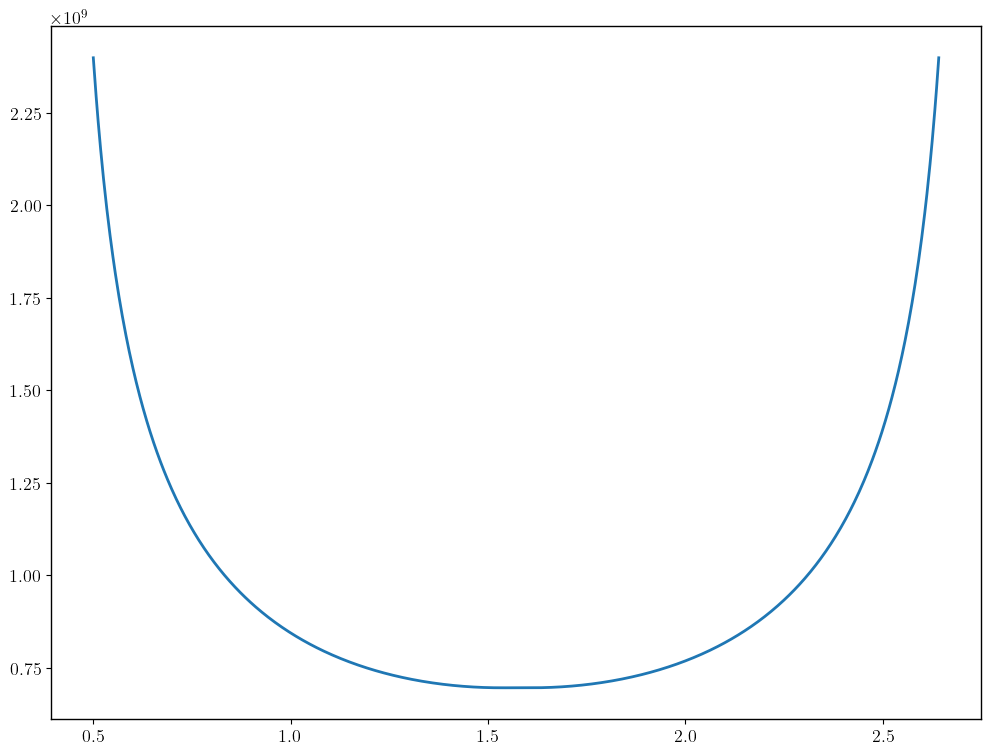

In [24]:
plt.plot(radFull, datFull)

In [ ]:
# test
rdat = np.linspace(rmin, rmax, 300)

# plot test
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4),
                       sharex=True, sharey=True,
                       gridspec_kw=dict(hspace=0.1, wspace=.1)) # espacio vertical y horizontal entre los subplots

ax.plot(r1[::4], f1[::4], ls='', marker='o', mfc='white', color='#f06b0c', label=r'Derecha')
ax.plot(r2[::4], f2[::4], ls='', marker='o', mfc='white', color='#8c7e7d', label=r'Izquierda')

ax.plot(radFull, datFull, ls='-', color='#0c8cf0', label='Completo')

ax.set_xlim(rmin, rmax)

ax.set_xlabel(r'$\phi\, [\mathrm{rad}]$')
ax.set_ylabel(r'$r$')
ax.legend(frameon=False);

#### Plot

In [ ]:
# datos
phidat = np.logspace(-3, np.log10(np.pi), 300) #np.linspace(0, np.pi, 300)[1:-1]
betaArray = [10**(18+i/2) for i in range(0, 6)]

delt0 = 0
delt1 = 1e-1*np.pi  # 
delt2 = -delt1

ii = 1
# analíticos
A1 = [R_func(phidat, delt0, mu, Rsun, nu, betaArray[ii], epsilon)*np.cos(phidat), 
      R_func(phidat, delt0, mu, Rsun, nu, betaArray[ii], epsilon)*np.sin(phidat)]
A2 = [R_func(phidat, delt1, mu, Rsun, nu, betaArray[ii], epsilon)*np.cos(phidat), 
      R_func(phidat, delt1, mu, Rsun, nu, betaArray[ii], epsilon)*np.sin(phidat)]
A3 = [R_func(phidat, delt2, mu, Rsun, nu, betaArray[ii], epsilon)*np.cos(phidat), 
      R_func(phidat, delt2, mu, Rsun, nu, betaArray[ii], epsilon)*np.sin(phidat)]

# Numéricos
param = [0, mu, Rsun, nu, betaS, eta]
N1, N1rad, _ = mod.full(param, lim, R_func)
param = [delt1, mu, Rsun, nu, betaS, eta]
N2, N2rad, _ = mod.full(param, lim, R_func)
param = [delt2, mu, Rsun, nu, betaS, eta]
N3, N3rad, _ = mod.full(param, lim, R_func)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),
                       sharex=True, sharey=True,
                       gridspec_kw=dict(hspace=0.1, wspace=.1)) # espacio vertical y horizontal entre los subplots

ax[0].plot(A1[0][::6], A1[1][::6], ls=' ', marker='o', mfc='white', color='#f06b0c', label=r'Analítico')
ax[0].plot(N1(N1rad)*np.cos(N1rad), N1(N1rad)*np.sin(N1rad), ls='-', color='#f06b0c', label=r'Numérico')

ax[1].plot(A2[0][::6], A2[1][::6], ls=' ', marker='o', mfc='white', color='#f06b0c', label=r'Analítico')
ax[1].plot(N2(N2rad)*np.cos(N2rad), N2(N2rad)*np.sin(N2rad), ls='-', color='#f06b0c', label=r'Numérico')

ax[2].plot(A3[0][::6], A3[1][::6], ls=' ', marker='o', mfc='white', color='#f06b0c', label=r'Analítico')
ax[2].plot(N3(N3rad)*np.cos(N3rad), N3(N3rad)*np.sin(N3rad), ls='-', color='#f06b0c', label=r'Numérico')


#ax[0].set_xlim(rmin, rmax)
ax[0].set_xlim(-8e8, 10e8)
ax[0].set_ylim(6.9e8, 8.4e8)

ax[0].set_xlabel(r'$\phi\, [\mathrm{rad}]$')
ax[0].set_ylabel(r'$r$')
ax[0].legend(frameon=False);